# Preparacion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, f1_score, recall_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold,KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import joblib
from google.colab import drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#datasets
df = pd.read_csv('/content/drive/MyDrive/Datasets_Datos/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Datasets_Datos/test.csv')
df_test_original = df_test.copy()
df_original = df.copy()

In [ ]:
df.columns

Index(['ID', 'review_es', 'sentimiento'], dtype='object')

In [ ]:
df

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,49998,Voy a tener que estar en desacuerdo con el com...,negativo


# Preprocesamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.review_es,
                                                   df.sentimiento,
                                                   test_size = 0.30,
                                                   random_state=25,
                                                   shuffle=True)

# Modelo Bayes Naive

In [ ]:
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model2 = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
predicted_categories1 = model1.predict(X_test)
predicted_categories2 = model2.predict(X_test)

In [ ]:
y_test

13920    positivo
23439    positivo
11851    positivo
8278     negativo
31258    positivo
           ...   
31994    positivo
4715     negativo
38700    negativo
49995    positivo
24859    positivo
Name: sentimiento, Length: 15000, dtype: object

In [ ]:
predicted_categories1

array(['positivo', 'positivo', 'positivo', ..., 'negativo', 'positivo',
       'positivo'], dtype='<U8')

In [ ]:
print("The f1score using TfidfVectorizer  is {}".format(f1_score(y_test,predicted_categories1 ,average='micro',)))
print("The accuracy using TfidfVectorizer  is {}".format(accuracy_score(y_test, predicted_categories1)))
print("The precision is TfidfVectorizer {}".format(precision_score(y_test, predicted_categories1, average='micro',)))
print("The recall TfidfVectorizer is {}".format(recall_score(y_test, predicted_categories1, average='micro',)))
print("The f1score countVectorizer is  {}".format(f1_score(y_test, predicted_categories2,average='micro',)))
print("The accuracy countVectorizer is  {}".format(accuracy_score(y_test, predicted_categories2)))
print("The precision countVectorizer is {}".format(precision_score(y_test, predicted_categories2, average='micro',)))
print("The recall countVectorizer is {}".format(recall_score(y_test, predicted_categories2, average='micro',)))

The f1score using TfidfVectorizer  is 0.8534666666666667
The accuracy using TfidfVectorizer  is 0.8534666666666667
The precision is TfidfVectorizer 0.8534666666666667
The recall TfidfVectorizer is 0.8534666666666667
The f1score countVectorizer is  0.8376
The accuracy countVectorizer is  0.8376
The precision countVectorizer is 0.8376
The recall countVectorizer is 0.8376


Por lo que vemos que usando el modelo de TfidVectorizer nos da un mejor accurcay y precision

Text(50.722222222222214, 0.5, 'True')

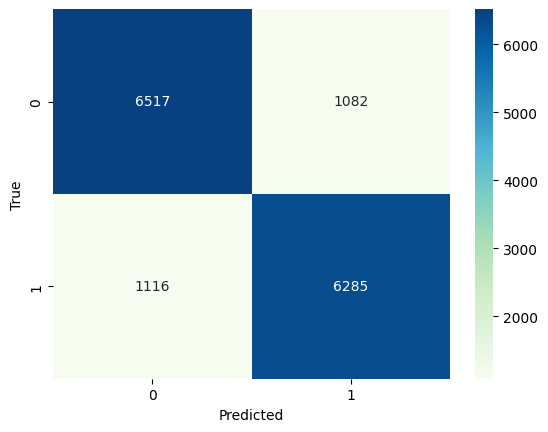

In [ ]:
tabla = confusion_matrix(y_test, predicted_categories1)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
y_pred = model1.predict(df_test.review_es)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_bn.csv', index=False)

In [ ]:
joblib.dump(model1, '/content/drive/MyDrive/pkl/naive_bayes_tfidvectorizer.pkl')

['/content/drive/MyDrive/pkl/naive_bayes_tfidvectorizer.pkl']

## Busqueda de hiperparametros


In [ ]:
spanish_stop_words = list(set(stopwords.words('spanish'))) ## ELIMINARRR


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups

spanish_stop_words = list(set(stopwords.words('spanish')))

# Definir el pipeline con vectorizador y clasificador
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'vectorizer__max_features': [1000, 5000],
    'classifier__alpha': [0.1, 1.0, 10.0],
    'vectorizer__stop_words': [None, spanish_stop_words],
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5,scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación f1 score de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'classifier__alpha': 10.0, 'vectorizer__max_features': 5000, 'vectorizer__stop_words': ['tuyos', 'e', 'tiene', 'seáis', 'había', 'era', 'serían', 'será', 'fueras', 'todos', 'estuviera', 'estaríais', 'habrá', 'tanto', 'hayáis', 'somos', 'uno', 'esto', 'estemos', 'hubieron', 'esos', 'estaréis', 'estada', 'yo', 'tengáis', 'vosotras', 'ese', 'estén', 'tendríais', 'sentido', 'unos', 'tuviera', 'eres', 'estaremos', 'estuvimos', 'habíais', 'estuvieseis', 'sobre', 'estar', 'estábamos', 'fuisteis', 'estuve', 'del', 'tuvimos', 'estáis', 'eso', 'les', 'ni', 'tenemos', 'lo', 'tu', 'tienen', 'mí', 'tuvierais', 'sí', 'haya', 'mías', 'tendrás', 'estarás', 'tenga', 'tenida', 'soy', 'tenías', 'están', 'otra', 'contra', 'cual', 'sean', 'hayan', 'estaré', 'hayamos', 'habríamos', 'fuéramos', 'estabas', 'nosotros', 'tendrán', 'tendría', 'estuviste', 'se', 'un', 'durante', 'tuya', 'y', 'vuestros', 'una', 'algunos', 'has', 'tuviéramos', 'siente', 'con', 'fueran', 'vuestr

In [ ]:
predicted_categories = grid_search.predict(X_test)

In [ ]:
predicted_categories

array(['positivo', 'positivo', 'positivo', ..., 'negativo', 'positivo',
       'positivo'], dtype='<U8')

In [ ]:
tabla = confusion_matrix(y_test, predicted_categories)

Text(50.722222222222214, 0.5, 'True')

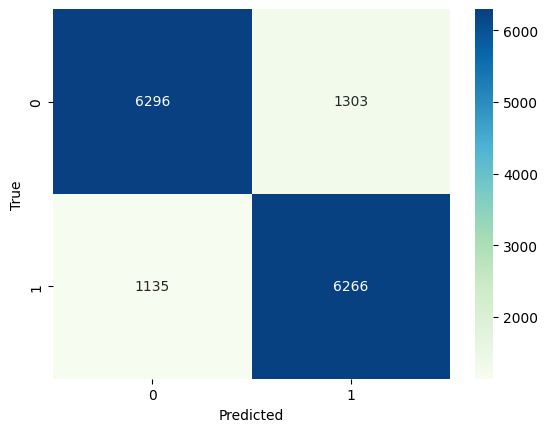

In [ ]:
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
y_pred = grid_search.predict(df_test.review_es)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_gs1.csv', index=False)

In [ ]:
joblib.dump(grid_search, '/content/drive/MyDrive/pkl/naive_bayes_cross_valgs1.pkl')

['/content/drive/MyDrive/pkl/naive_bayes_cross_valgs.pkl']

## Segunda Busqueda de Hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups


# Definir el pipeline con vectorizador y clasificador
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'vectorizer__max_features': [1000, 5000],
    'classifier__alpha': [0.1, 0.5, 1.0, 10.0],
    'vectorizer__stop_words': [None, spanish_stop_words],
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5,scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación f1 score de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'classifier__alpha': 0.1, 'vectorizer__max_features': 5000, 'vectorizer__stop_words': ['hubiera', 'poco', 'tendréis', 'seré', 'estarás', 'algunos', 'habrían', 'sin', 'nos', 'hube', 'otro', 'tened', 'tuya', 'otras', 'estaríamos', 'era', 'hubimos', 'siente', 'esto', 'estadas', 'tuviéramos', 'tengas', 'entre', 'algunas', 'éramos', 'teníais', 'soy', 'hayamos', 'ellas', 'tendríamos', 'ese', 'fuese', 'somos', 'tuvieses', 'tuvo', 'tendrá', 'tenga', 'seríamos', 'tendrían', 'sentidos', 'fueras', 'habré', 'nada', 'estar', 'habrás', 'mucho', 'tú', 'pero', 'no', 'sentidas', 'fuimos', 'hubisteis', 'estad', 'tendremos', 'estáis', 'él', 'tenida', 'estás', 'hubierais', 'eso', 'estaban', 'más', 'ya', 'vuestros', 'las', 'nuestras', 'quien', 'estaréis', 'tu', 'mío', 'fueseis', 'tendrías', 'la', 'yo', 'hubiesen', 'tuvieras', 'seréis', 'mí', 'tuvieran', 'estará', 'estuvieron', 'fuera', 'hubieses', 'estuvo', 'teníamos', 'mía', 'tenemos', 'hubieseis', 'quienes', 'hubiera

In [ ]:
predicted_categories = grid_search.predict(X_test)

In [ ]:
tabla = confusion_matrix(y_test, predicted_categories)

Text(50.722222222222214, 0.5, 'True')

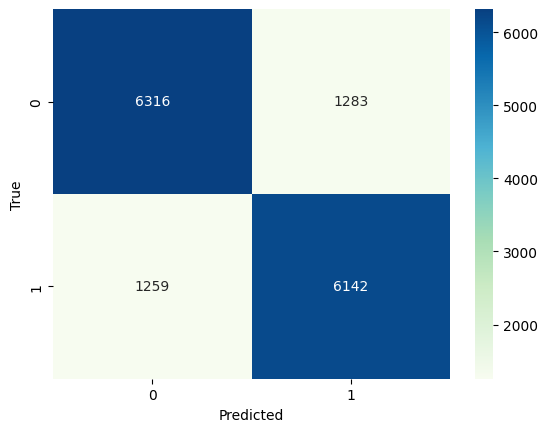

In [ ]:
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
y_pred = grid_search.predict(df_test.review_es)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_gs2.csv', index=False)

In [ ]:
joblib.dump(grid_search, '/content/drive/MyDrive/pkl/naive_bayes_cross_val_2.pkl')

['/content/drive/MyDrive/pkl/naive_bayes_cross_val_2.pkl']

## Tercera busqueda

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups


# Definir el pipeline con vectorizador y clasificador
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'vectorizer__max_features': [1000, 5000, 6000, 9000],
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'vectorizer__stop_words': [None, spanish_stop_words],
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5,scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación f1 score de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'classifier__alpha': 1.0, 'vectorizer__max_features': 9000, 'vectorizer__stop_words': ['el', 'él', 'sentid', 'estéis', 'sus', 'estuvieses', 'tengan', 'eran', 'mí', 'estaré', 'pero', 'estarán', 'seremos', 'hubo', 'eso', 'les', 'tengáis', 'estabais', 'hubisteis', 'habéis', 'seáis', 'hubieras', 'teniendo', 'tenido', 'a', 'tendrá', 'estará', 'donde', 'fueseis', 'tendrás', 'tengo', 'uno', 'fuéramos', 'tened', 'tenía', 'sin', 'has', 'antes', 'poco', 'del', 'mío', 'estarás', 'sería', 'estén', 'hubieseis', 'habías', 'que', 'tú', 'me', 'fuera', 'mis', 'tuvieran', 'estarían', 'tuvieron', 'hay', 'míos', 'estuviéramos', 'estad', 'serían', 'en', 'ante', 'estuvieron', 'tuvisteis', 'estaréis', 'vuestra', 'nos', 'estuvo', 'habidos', 'ellos', 'unos', 'tendrían', 'habidas', 'tuvierais', 'estaríais', 'tuyo', 'hayan', 'sentido', 'habríais', 'estaría', 'tu', 'muy', 'habremos', 'fueran', 'fuese', 'haya', 'estaba', 'como', 'los', 'e', 'una', 'nuestras', 'eras', 'nuestro'

In [ ]:
predicted_categories = grid_search.predict(X_test)

In [ ]:
tabla = confusion_matrix(y_test, predicted_categories)

Text(50.722222222222214, 0.5, 'True')

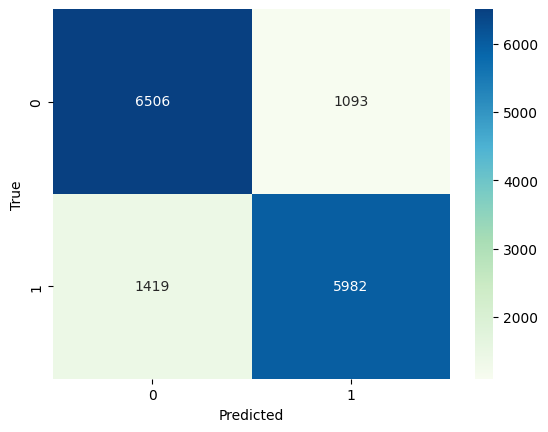

In [ ]:
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
y_pred = grid_search.predict(df_test.review_es)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_gs3_bn.csv', index=False)

In [ ]:
joblib.dump(grid_search, '/content/drive/MyDrive/pkl/naive_bayes_cross_val_3.pkl')

['/content/drive/MyDrive/pkl/naive_bayes_cross_val_3.pkl']

## Cuarta busqueda

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups


# Definir el pipeline con vectorizador y clasificador
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'vectorizer__max_features': [20000, 30000, 40000],
    'classifier__alpha': [0.01, 0.1, 1.0],
    'vectorizer__stop_words': [None, spanish_stop_words],
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5,scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación f1 score de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'classifier__alpha': 0.1, 'vectorizer__max_features': 30000, 'vectorizer__stop_words': ['el', 'él', 'sentid', 'estéis', 'sus', 'estuvieses', 'tengan', 'eran', 'mí', 'estaré', 'pero', 'estarán', 'seremos', 'hubo', 'eso', 'les', 'tengáis', 'estabais', 'hubisteis', 'habéis', 'seáis', 'hubieras', 'teniendo', 'tenido', 'a', 'tendrá', 'estará', 'donde', 'fueseis', 'tendrás', 'tengo', 'uno', 'fuéramos', 'tened', 'tenía', 'sin', 'has', 'antes', 'poco', 'del', 'mío', 'estarás', 'sería', 'estén', 'hubieseis', 'habías', 'que', 'tú', 'me', 'fuera', 'mis', 'tuvieran', 'estarían', 'tuvieron', 'hay', 'míos', 'estuviéramos', 'estad', 'serían', 'en', 'ante', 'estuvieron', 'tuvisteis', 'estaréis', 'vuestra', 'nos', 'estuvo', 'habidos', 'ellos', 'unos', 'tendrían', 'habidas', 'tuvierais', 'estaríais', 'tuyo', 'hayan', 'sentido', 'habríais', 'estaría', 'tu', 'muy', 'habremos', 'fueran', 'fuese', 'haya', 'estaba', 'como', 'los', 'e', 'una', 'nuestras', 'eras', 'nuestro

In [ ]:
predicted_categories = grid_search.predict(X_test)

In [ ]:
tabla = confusion_matrix(y_test, predicted_categories)

Text(50.722222222222214, 0.5, 'True')

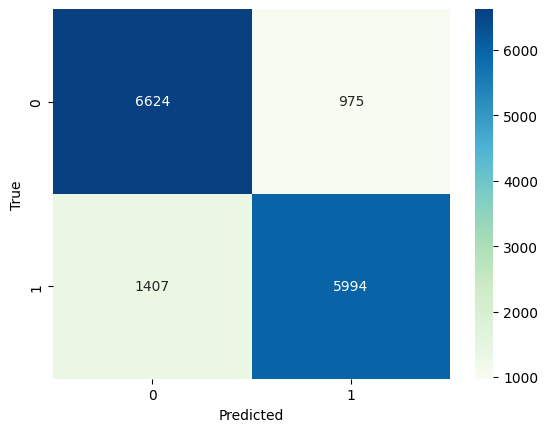

In [ ]:
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
y_pred = grid_search.predict(df_test.review_es)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_gs5_bn.csv', index=False)

In [ ]:
joblib.dump(grid_search, '/content/drive/MyDrive/pkl/naive_bayes_cross_val_5.pkl')

['/content/drive/MyDrive/pkl/naive_bayes_cross_val_5.pkl']

## Preprocesamiento del database


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
pip install Unidecode

In [ ]:
pip install langdetect


In [ ]:
pip install spacy

In [ ]:
import spacy


In [ ]:
!python -m spacy download es_core_news_sm


2023-06-29 22:50:23.142901: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 15.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
nlp = spacy.load("es_core_news_sm")


In [ ]:
from langdetect import detect


In [ ]:
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from tensorflow import keras
import tensorflow as tf
from keras import layers
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import FunctionTransformer
from unidecode import unidecode
import re


In [ ]:
def solo_espanol(data):
  reviews = data.review_es
  datitaset = data.copy()
  for i, x in enumerate(reviews):
    if(detect(x) != 'es'):
      datitaset = datitaset.drop(data.index[i])
  return datitaset



def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text

def preprocess_text(text):
    # Tokenize text into individual words
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords
    stop_words_espanol = set(stopwords.words('spanish'))

    tokens = [token for token in tokens if token not in stop_words_espanol]
    text = " ".join([word for word in tokens if unidecode(word) == word])

    return text

In [ ]:
def solo_espanol_test(data):
  reviews = data.review_es
  datitaset = data.copy()
  for i, x in enumerate(reviews):
    if(detect(x) != 'es'):
      print(x, i)
      datitaset = datitaset.drop(data.index[i])
  return datitaset

In [ ]:
def obtener_id_no_espanol(data):
  reviews = data.review_es
  ids = []
  for i, x in enumerate(reviews):
    if(detect(x) != 'es'):
      print(x)
      ids.append(i)
  return ids


In [ ]:
def lemmatizacion(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    lemmas = " ".join(lemmas)
    return lemmas


In [ ]:
dataset = solo_espanol(df)

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(dataset.sentimiento)

In [ ]:
cleaned_texts = [clean_text(text) for text in dataset.review_es]
preprocessed_texts = [preprocess_text(text) for text in cleaned_texts]

In [ ]:
lemmas =  [lemmatizacion(text) for text in preprocessed_texts]


In [ ]:
labels = pd.DataFrame(encoded_labels, columns=["sentimiento"])

In [ ]:
reviews_train, reviews_test, labels_train, labels_test = train_test_split(lemmas, labels, test_size=0.2, random_state=42)


## Tercera Busqueda de hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups

spanish_stop_words = list(set(stopwords.words('spanish')))

# Definir el pipeline con vectorizador y clasificador
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'vectorizer__max_features': [1000, 5000],
    'classifier__alpha': [0.1, 1.0, 10.0],
    'vectorizer__stop_words': [None, spanish_stop_words],
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5,scoring='f1_macro')
grid_search.fit(reviews_train, labels_train.sentimiento)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación f1 score de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'classifier__alpha': 10.0, 'vectorizer__max_features': 5000, 'vectorizer__stop_words': ['hasta', 'seríamos', 'habías', 'esas', 'seas', 'desde', 'esto', 'tanto', 'tuviste', 'estar', 'estábamos', 'ellos', 'fuera', 'estaba', 'pero', 'habrá', 'tenías', 'del', 'fuimos', 'tenido', 'tendríais', 'estamos', 'tuyas', 'estad', 'estuviera', 'donde', 'sentido', 'ante', 'contra', 'los', 'tengamos', 'sean', 'estuviéramos', 'hubo', 'a', 'tenía', 'vuestros', 'le', 'sobre', 'nuestras', 'estos', 'tú', 'la', 'tuvieras', 'hubisteis', 'eran', 'mis', 'tendrían', 'vosotros', 'quien', 'estaré', 'teníamos', 'poco', 'fui', 'hubiésemos', 'habrás', 'este', 'yo', 'habían', 'tuvimos', 'habría', 'les', 'cual', 'tuyo', 'estemos', 'tienen', 'está', 'soy', 'estarías', 'habiendo', 'os', 'estando', 'esté', 'nuestros', 'vuestro', 'se', 'mías', 'he', 'hubieses', 'fueras', 'o', 'por', 'unos', 'tendrías', 'hubiéramos', 'tendría', 'eras', 'suyo', 'sois', 'nosotras', 'hubieseis', 'tendréis'

In [ ]:
predicted_categories = grid_search.predict(reviews_test)

In [ ]:
len(predicted_categories)

9637

In [ ]:
tabla = confusion_matrix(labels_test.sentimiento, predicted_categories)

Text(50.722222222222214, 0.5, 'True')

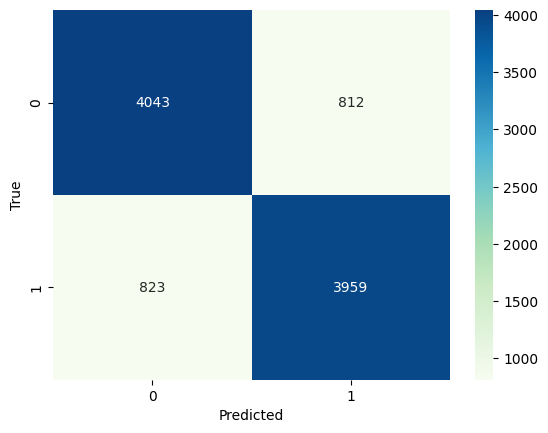

In [ ]:
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print("The f1score countVectorizer is  {}".format(f1_score(labels_test.sentimiento, predicted_categories,average='micro',)))
print("The accuracy countVectorizer is  {}".format(accuracy_score(labels_test.sentimiento, predicted_categories)))
print("The precision countVectorizer is {}".format(precision_score(labels_test.sentimiento, predicted_categories, average='micro',)))
print("The recall countVectorizer is {}".format(recall_score(labels_test.sentimiento, predicted_categories, average='micro',)))

The f1score countVectorizer is  0.8303413925495486
The accuracy countVectorizer is  0.8303413925495486
The precision countVectorizer is 0.8303413925495486
The recall countVectorizer is 0.8303413925495486


### df test sin porocesar

In [ ]:
y_pred = grid_search.predict(df_test.review_es)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_gs_naivebayes_crossval_hiperparametros3.csv', index=False)

In [ ]:
joblib.dump(grid_search, '/content/drive/MyDrive/pkl/naive_bayes_cross_val_tercera_busqueda_countvect.pkl')

['/content/drive/MyDrive/pkl/naive_bayes_cross_val_tercera_busqueda_countvect.pkl']

# Modelo Random Forest

## Modelo Base

In [ ]:
rf = RandomForestClassifier()


In [ ]:
model3 = make_pipeline(TfidfVectorizer(), rf)
model4 = make_pipeline(CountVectorizer(), rf)

In [ ]:
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
#predicted_categories = model3.predict(X_test)
predicted_categories3 = model3.predict(X_test)
predicted_categories4 = model4.predict(X_test)

In [ ]:
print("The f1score using TfidfVectorizer  is {}".format(f1_score(y_test,predicted_categories3 ,average='micro',)))
print("The accuracy using TfidfVectorizer  is {}".format(accuracy_score(y_test, predicted_categories3)))
print("The precision is TfidfVectorizer {}".format(precision_score(y_test, predicted_categories3, average='micro',)))
print("The f1score countVectorizer is  {}".format(f1_score(y_test, predicted_categories4,average='micro',)))
print("The accuracy countVectorizer is  {}".format(accuracy_score(y_test, predicted_categories4)))
print("The precision countVectorizer is {}".format(precision_score(y_test, predicted_categories4, average='micro',)))

The f1score using TfidfVectorizer  is 0.49393333333333334
The accuracy using TfidfVectorizer  is 0.49393333333333334
The precision is TfidfVectorizer 0.49393333333333334
The f1score countVectorizer is  0.834
The accuracy countVectorizer is  0.834
The precision countVectorizer is 0.834


Por lo que decidimos quedarnos con el CountVectorizer

In [ ]:
tabla = confusion_matrix(y_test, predicted_categories4)

Text(50.722222222222214, 0.5, 'True')

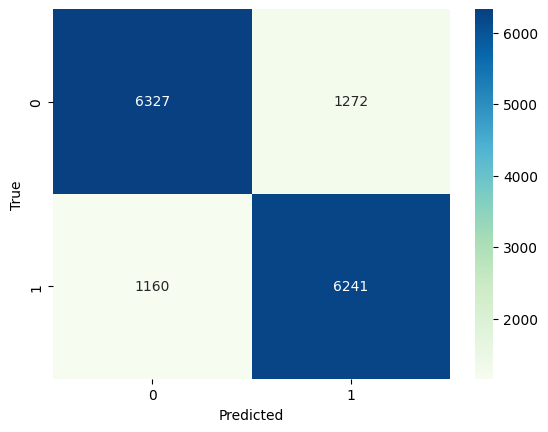

In [ ]:
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
y_pred = model4.predict(df_test.review_es)

In [ ]:
#df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
#df_submission.to_csv('/content/drive/MyDrive/submissions/submission_2.csv', index=False)

In [ ]:
#joblib.dump(model4, '/content/drive/MyDrive/pkl/rf_base_countvectorizer.pkl')

['/content/drive/MyDrive/pkl/rf_base_countvectorizer.pkl']

## Tokenizer+CountVectorizer

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from scipy.stats import randint

# Descargar recursos adicionales de NLTK
nltk.download('punkt')

# Dataset de ejemplo
textos = X_test
etiquetas = y_test  # Etiquetas correspondientes a cada texto

# Tokenizar los textos
textos_tokenizados = [word_tokenize(texto) for texto in textos]

# Crear un vectorizador de palabras
vectorizador = CountVectorizer()

# Obtener la matriz de características
matriz_caracteristicas = vectorizador.fit_transform([' '.join(tokens) for tokens in textos_tokenizados])

# Crear un clasificador de Random Forest
clf = RandomForestClassifier()

# Definir los hiperparámetros a ajustar
parametros = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Definir una función de puntuación personalizada usando F1 score
def f1_scoring(estimator, X, y):
    y_pred = estimator.predict(X)
    return f1_score(y, y_pred, pos_label='positivo')

# Realizar la búsqueda de hiperparámetros con la función de puntuación personalizada
busqueda = RandomizedSearchCV(clf, parametros, n_iter=10, cv=3, scoring=f1_scoring)
busqueda.fit(matriz_caracteristicas, etiquetas)

# Obtener los mejores hiperparámetros y el mejor modelo
mejores_hiperparametros = busqueda.best_params_
mejor_modelo = busqueda.best_estimator_

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(mejores_hiperparametros)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 86}


In [ ]:
# Realizar predicciones con el mejor modelo
nuevo_texto = X_test
nuevo_texto_tokenizado = [word_tokenize(texto) for texto in nuevo_texto]
nueva_matriz_caracteristicas = vectorizador.transform([' '.join(tokens) for tokens in nuevo_texto_tokenizado])
prediccion = mejor_modelo.predict(nueva_matriz_caracteristicas)

print("Mejores hiperparámetros:", mejores_hiperparametros)
print("Predicción:", prediccion)

Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 86}
Predicción: ['positivo' 'negativo' 'positivo' ... 'negativo' 'negativo' 'positivo']


In [ ]:
len(prediccion)

8599

Text(50.722222222222214, 0.5, 'True')

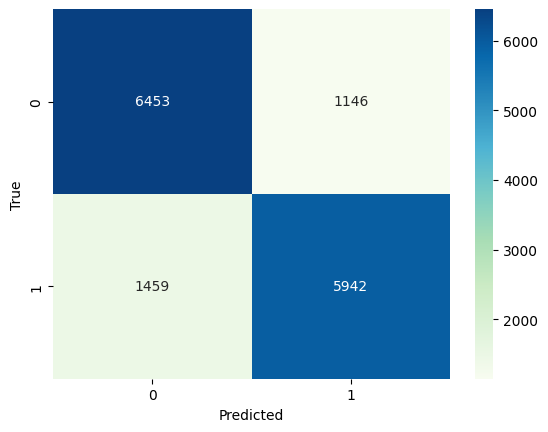

In [ ]:
tabla = confusion_matrix(y_test, prediccion)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print("The accuracy :{}".format(accuracy_score(y_test, prediccion)))

The accuracy :0.8263333333333334


In [ ]:
# Realizar predicciones con el mejor modelo
nuevo_texto = df_test.review_es
nuevo_texto_tokenizado = [word_tokenize(texto) for texto in nuevo_texto]
nueva_matriz_caracteristicas = vectorizador.transform([' '.join(tokens) for tokens in nuevo_texto_tokenizado])
y_predict = mejor_modelo.predict(nueva_matriz_caracteristicas)

print("Mejores hiperparámetros:", mejores_hiperparametros)
print("Predicción:", prediccion)

Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 86}
Predicción: ['positivo' 'negativo' 'positivo' ... 'negativo' 'negativo' 'positivo']


In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_predict})
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_rf_tc.csv', index=False)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Descargar recursos adicionales de NLTK
nltk.download('punkt')

# Dataset de ejemplo
textos = df.
etiquetas = [0, 1, 0]  # Etiquetas correspondientes a cada texto

# Tokenizar los textos
textos_tokenizados = [word_tokenize(texto) for texto in textos]

# Crear un vectorizador de palabras
vectorizador = CountVectorizer()

# Obtener la matriz de características
matriz_caracteristicas = vectorizador.fit_transform([' '.join(tokens) for tokens in textos_tokenizados])

# Crear un clasificador de Random Forest
clf = RandomForestClassifier()

# Entrenar el clasificador
clf.fit(matriz_caracteristicas, etiquetas)

# Realizar predicciones
nuevo_texto = "Este es un nuevo texto para predecir."
nuevo_texto_tokenizado = word_tokenize(nuevo_texto)
nueva_matriz_caracteristicas = vectorizador.transform([' '.join(nuevo_texto_tokenizado)])
prediccion = clf.predict(nueva_matriz_caracteristicas)

print(prediccion)


## Procesamiento

In [ ]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = stopwords.words('spanish')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

In [ ]:
df['clean']=df['review_es'].map(clean)

In [ ]:
def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean)
tfidf_vect_fit=tfidf_vect.fit(X_train)
X_train=vectorize(X_train,tfidf_vect_fit)

In [ ]:
y_train=vectorize(y_train,tfidf_vect_fit)

In [ ]:
params_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [2, 4, 10, 12, 16],
               "n_estimators": [10,20, 50] }

clf = make_pipeline(CountVectorizer(),
                    RandomizedSearchCV(rf,
                                 params_grid,
                                 scoring='f1', n_iter=10,
                                random_state=5))

clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

    negativo       0.83      0.78      0.80      7599
    positivo       0.79      0.83      0.81      7401

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000



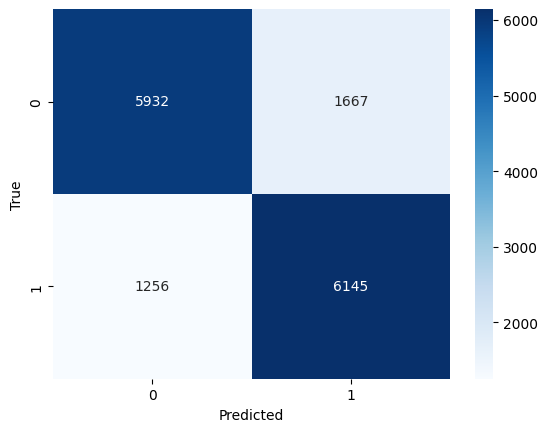

In [ ]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

In [ ]:
y_pred = clf.predict(df_test.review_es)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_4.csv', index=False)

In [ ]:
joblib.dump(clf, '/content/drive/MyDrive/pkl/rf_base_countvectorizer_random_search.pkl')

['/content/drive/MyDrive/pkl/rf_base_countvectorizer_random_search.pkl']

# Modelo XGBoost



## Preparacion

In [ ]:
#Creo el modelo y lo entreno

import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100)


In [ ]:
dataset = pd.get_dummies(df, columns=["sentimiento"], drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['review_es'],
                                                   dataset['sentimiento_positivo'],
                                                   test_size = 0.30,
                                                   random_state=25,
                                                   shuffle=True)

## Modelo Base

In [ ]:
model5 = make_pipeline(CountVectorizer(), xgb_model)

In [ ]:
model5.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7599
           1       0.82      0.86      0.84      7401

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



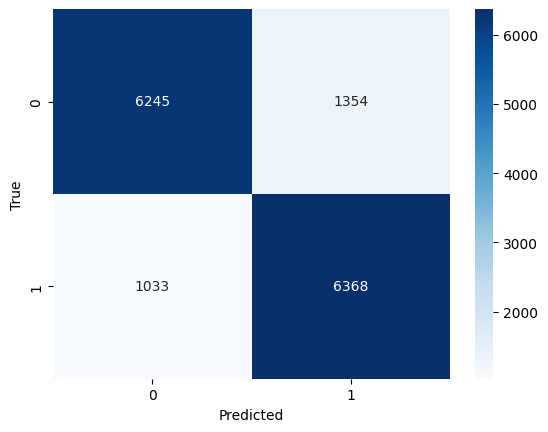

In [ ]:
#Matriz de Confusion
y_pred=model5.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

In [ ]:
#Matriz de Confusion
y_pred=model5.predict(df_test.review_es)


In [ ]:
df_submission.loc[df_submission.loc[:,"sentimiento"]== 1,"sentimiento"]="positivo"
df_submission.loc[df_submission.loc[:,"sentimiento"]== 0,"sentimiento"]="negativo"


In [ ]:
df_submission

,id,sentimiento,semintimiento
0,60000,negativo,NaN
1,60001,negativo,NaN
2,60002,negativo,NaN
3,60003,negativo,NaN
4,60004,negativo,NaN
...,...,...,...
8594,68594,positivo,positivo
8595,68595,negativo,NaN
8596,68596,positivo,positivo
8597,68597,negativo,NaN


In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.loc[df_submission.loc[:,"sentimiento"]== 1,"sentimiento"]="positivo"
df_submission.loc[df_submission.loc[:,"sentimiento"]== 0,"sentimiento"]="negativo"


In [ ]:
df_submission

,id,sentimiento
0,60000,negativo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,negativo
...,...,...
8594,68594,positivo
8595,68595,negativo
8596,68596,positivo
8597,68597,negativo


In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_5.csv', index=False)

In [ ]:
joblib.dump(model5, '/content/drive/MyDrive/pkl/XGBOOST__base_countvectorizer_.pkl')

['/content/drive/MyDrive/pkl/XGBOOST__base_countvectorizer_.pkl']

##Busqueda de hiperparametros


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

In [ ]:
clf = make_pipeline(CountVectorizer(),
                    RandomizedSearchCV(xgb_model,
                                 param_grid,
                                 scoring='f1', n_iter=10,
                                random_state=5))

clf.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_poli...
                                                            max_cat_to_onehot=None,
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=0, ...),
                                    param_distributions={'learning_rate': [0.1,
                                                                           0.01,
                                                                           0.001],
                                                         'max_depth': [3, 5, 7],
                                                         'n_estimators': [100,
                                                                          200,
                                                                          300]},
                                    random_state=5, scoring='f1'))])

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      7599
           1       0.80      0.87      0.83      7401

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



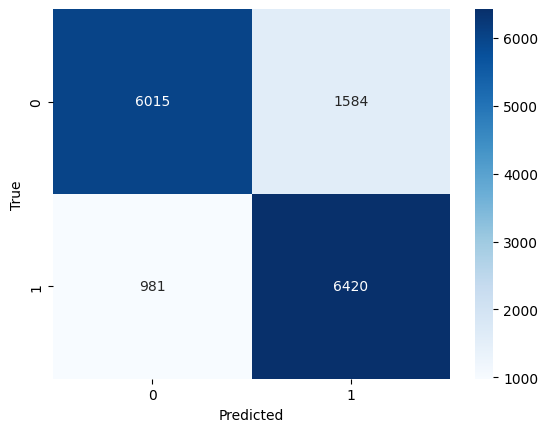

In [ ]:
#Matriz de Confusion
y_pred=clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

In [ ]:
#Matriz de Confusion
y_pred=clf.predict(df_test.review_es)


In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.loc[df_submission.loc[:,"sentimiento"]== 1,"sentimiento"]="positivo"
df_submission.loc[df_submission.loc[:,"sentimiento"]== 0,"sentimiento"]="negativo"


In [ ]:
df_submission

,id,sentimiento
0,60000,positivo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,negativo
...,...,...
8594,68594,positivo
8595,68595,negativo
8596,68596,positivo
8597,68597,negativo


In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_6.csv', index=False)

In [ ]:
joblib.dump(model5, '/content/drive/MyDrive/pkl/XGBOOST__GridSearch_countvectorizer_.pkl')

['/content/drive/MyDrive/pkl/XGBOOST__GridSearch_countvectorizer_.pkl']

## Otros hiperparametros

In [ ]:
param_grid = {
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5],
    'learning_rate': [0.012]
    }

# Set up the k-fold cross-validation
kfoldcv = StratifiedKFold(n_splits=10)

#Ramdom Search CV
randomcv = RandomizedSearchCV(xgb.XGBClassifier(), param_grid, n_jobs=10, scoring='f1',cv=kfoldcv, n_iter=10)

In [ ]:
clf = make_pipeline(CountVectorizer(),
                    RandomizedSearchCV(xgb_model,
                                 param_grid,
                                 scoring='f1', n_iter=10,
                                random_state=5))

clf.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_poli...
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=0, ...),
                                    param_distributions={'colsample_bytree': [0.3,
                                                                              0.5,
                                                                              0.8],
                                                         'learning_rate': [0.012],
                                                         'reg_alpha': [0, 0.5,
                                                                       1, 5],
                                                         'reg_lambda': [0, 0.5,
                                                                        1, 5]},
                                    random_state=5, scoring='f1'))])

              precision    recall  f1-score   support

           0       0.81      0.69      0.74      7599
           1       0.72      0.83      0.77      7401

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000



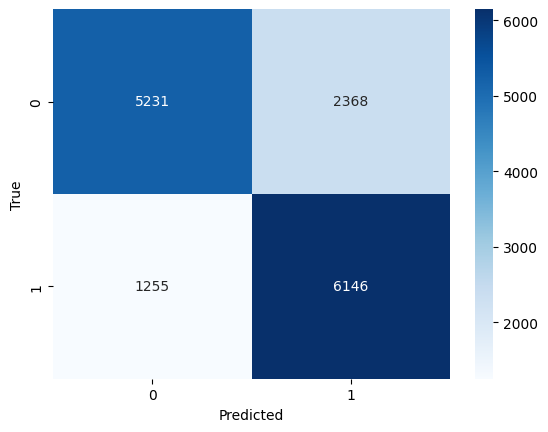

In [ ]:
#Matriz de Confusion
y_pred=clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

In [ ]:
#Matriz de Confusion
y_pred=clf.predict(df_test.review_es)


In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':y_pred})
df_submission.loc[df_submission.loc[:,"sentimiento"]== 1,"sentimiento"]="positivo"
df_submission.loc[df_submission.loc[:,"sentimiento"]== 0,"sentimiento"]="negativo"


In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_10.csv', index=False)

In [ ]:
joblib.dump(clf, '/content/drive/MyDrive/pkl/XGBOOST__GridSearch_countvectorizer_cross_val.pkl')

['/content/drive/MyDrive/pkl/XGBOOST__GridSearch_countvectorizer_cross_val.pkl']

In [ ]:
df_submission

,id,sentimiento
0,60000,negativo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,positivo
...,...,...
8594,68594,positivo
8595,68595,positivo
8596,68596,negativo
8597,68597,negativo


# Red Neuronal


## Preparacion

In [ ]:
pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
pip install langdetect


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=4ab6bb8252c6383c5fb7ffbfff7ef96b48a42be79d1a0f0962f281c2094eac3a
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy


In [ ]:
!python -m spacy download es_core_news_sm


2023-06-27 13:07:00.286597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 27.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
nlp = spacy.load("es_core_news_sm")


In [ ]:
from langdetect import detect


In [ ]:
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from tensorflow import keras
import tensorflow as tf
from keras import layers
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import FunctionTransformer
from unidecode import unidecode
import re


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def solo_espanol(data):
  reviews = data.review_es
  datitaset = data.copy()
  for i, x in enumerate(reviews):
    if(detect(x) != 'es'):
      datitaset = datitaset.drop(data.index[i])
  return datitaset



def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text

def preprocess_text(text):
    # Tokenize text into individual words
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords
    stop_words_espanol = set(stopwords.words('spanish'))
    stop_words_ingles = set(stopwords.words('english'))

    tokens = [token for token in tokens if token not in stop_words_espanol]
    text = " ".join([word for word in tokens if unidecode(word) == word])

    return text

In [ ]:
def solo_espanol_test(data):
  reviews = data.review_es
  datitaset = data.copy()
  for i, x in enumerate(reviews):
    if(detect(x) != 'es'):
      print(x, i)
      datitaset = datitaset.drop(data.index[i])
  return datitaset

In [ ]:
def obtener_id_no_espanol(data):
  reviews = data.review_es
  ids = []
  for i, x in enumerate(reviews):
    if(detect(x) != 'es'):
      print(x)
      ids.append(i)
  return ids


In [ ]:
def lemmatizacion(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    lemmas = " ".join(lemmas)
    return lemmas


In [ ]:
reviews_train, reviews_test, labels_train, labels_test = train_test_split(df.review_es, df.sentimiento, test_size=0.2, random_state=42)


Nos quedamos con las reviews que estan en español

In [ ]:
dataset = solo_espanol(df)

Transformamos la columna de sentimientos en 0 y 1

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(dataset.sentimiento)

In [ ]:
labels = pd.DataFrame(encoded_labels, columns=["sentimiento"])

Limpiamos las reviews con clean texts eliminando numeros, caracteres especiales, tildes.
Con preprocessed text transformamos el texto a minuscula y quitamos las stop-words

In [ ]:
cleaned_texts = [clean_text(text) for text in dataset.review_es]
preprocessed_texts = [preprocess_text(text) for text in cleaned_texts]

In [ ]:
preprocessed_texts

['crticos mencionado despus ver solo oz episodio enganchado razn exactamente sucedi conmigo primera cosa golpe oz brutalidad escenas violencia inconfiadas encuentran derecha palabra confa m espectculo dbiles corazn tmido espectculo extrae punzones respecto drogas sexo violencia hardcore uso clsico palabra llama oz apodo dado penitenciario seguridad mximo oswald centra principalmente ciudad emeralda seccin experimental prisin todas clulas frentes vidrio enfrentan hacia adentro privacidad alta agenda em city hogar fariarios musulmanes gangstas latinos cristianos italianos irlandeses ms as esposas miradas muerte relaciones peligrosas acuerdos sombreados nunca estn lejos dira principal atractivo espectculo debe hecho va espectculos atreveran olvdate imgenes bonitas pintadas audiencias convencionales olvidan encanto olviden romance oz mete primer episodio visto sorprendi tan desagradable surrealista poda decir listo ello observ ms desarroll gusto oz acostumbr altos niveles violencia grfica 

Utilizamos la lematizacion para transformar las palabras y devolverlas a su palabra raiz

In [ ]:
lemmas =  [lemmatizacion(text) for text in preprocessed_texts]


In [ ]:
lemmas

['crtico mencionado despu ver solo oz episodio enganchado razn exactamente sucedi yo primero cosa golpe oz brutalidad escena violencia inconfiada encontrar derecha palabra confar m espectculo dbilser corazn tmido espectculo extraer punzón respecto droga sexo violencia hardcore uso clsico palabra llamar oz apodo dado penitenciario seguridad mximo oswald centrar principalmente ciudad emeralda seccin experimental prisin todo clula frente vidrio enfrentar hacia adentro privacidad alto agenda em city hogar fariario musulmán gangsta latino cristiano italiano irlandés ms as esposa mirada muerte relación peligroso acuerdo sombreado nunca estn lejos dirar principal atractivo espectculo deber hacer ir espectculo atreverar olvdate imgén bonito pintado audiencia convencional olvidar encanto olvidar romance oz mete primero episodio visto sorprendi tanto desagradable surrealista poda decir listo él observ ms desarroll gusto oz acostumbr alto nivel violencia grfica solo violencia sino injusticia guar

Separamos en train y test

In [ ]:
reviews_train, reviews_test, labels_train, labels_test = train_test_split(lemmas, labels, test_size=0.2, random_state=42)


Utilizamos CountVectorizer para tokenizar y contar las ocurrencias, seleccionamos 0.25 como minimo para eliminar las palabras que menos aparecen y como maximo 0.70 para eliminar palabras que aparecen en 70% o mas de las reviews ya que pueden ser conectores.

In [ ]:
vectorizer = CountVectorizer(min_df=0.25, max_df=0.7)
X_train_transformed = vectorizer.fit_transform(reviews_train)
X_test_transformed = vectorizer.transform(reviews_test)

Creamos el modelo y lo compilamos

In [ ]:
modelo = keras.Sequential([
    keras.layers.Dense(1,input_dim=X_train_transformed.shape[1]),
    keras.layers.Dense(1, activation='sigmoid')])

modelo.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy', metrics="accuracy")

Entrenamos el modelo

In [ ]:
modelo.fit(X_train_transformed.toarray(), labels_train.sentimiento,epochs=100,batch_size=50,verbose=False)


Analizamos

In [ ]:
y_predic_1 = modelo.predict(X_test_transformed.toarray())
y_predic_cat_1 = np.where(y_predic_1>0.49, 1,0)

In [ ]:
data = pd.Series(labels_test.sentimiento)

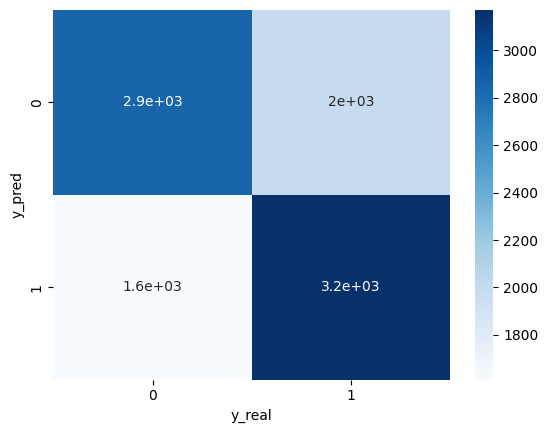

In [ ]:

ds_validacion=pd.DataFrame(y_predic_cat_1, data).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
print("The f1score countVectorizer is  {}".format(f1_score(labels_test, y_predic_cat_1,average='micro',)))
print("The accuracy countVectorizer is  {}".format(accuracy_score(labels_test, y_predic_cat_1)))
print("The precision countVectorizer is {}".format(precision_score(labels_test, y_predic_cat_1, average='micro',)))
print("The recall countVectorizer is {}".format(recall_score(labels_test, y_predic_cat_1, average='micro',)))

The f1score countVectorizer is  0.6249870291584518
The accuracy countVectorizer is  0.6249870291584518
The precision countVectorizer is 0.6249870291584518
The recall countVectorizer is 0.6249870291584518


## Predicciones

In [ ]:
df_test

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


In [ ]:
datatest = solo_espanol_test(df_test)

In [ ]:
datatest

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


In [ ]:
cleaned_texts_test = [clean_text(text) for text in datatest.review_es]
preprocessed_texts_test = [preprocess_text(text) for text in cleaned_texts_test]

In [ ]:
lemmastest =  [lemmatizacion(text) for text in preprocessed_texts_test]

In [ ]:
X_predict_transformed = vectorizer.transform(lemmastest)


In [ ]:
y_predicciones = modelo.predict(X_predict_transformed.toarray())

269/269 [==============================] - 0s 1ms/step


In [ ]:
y_predic_cat_2 = np.where(y_predicciones>0.4, 1,0)

In [ ]:
ids = obtener_id_no_espanol(df_test)

In [ ]:
predicciones = pd.DataFrame(y_predic_cat_2)

In [ ]:
predicciones_sentimiento = pd.DataFrame({'sentimiento': predicciones.iloc[:,0]})

In [ ]:
df_submission = pd.DataFrame()

In [ ]:
df_submission['id'] = datatest['ID']

In [ ]:
df_submission

,id
0,60000
1,60001
2,60002
3,60003
4,60004
...,...
8594,68594
8595,68595
8596,68596
8597,68597


In [ ]:
df_submission['sentimiento'] = predicciones_sentimiento['sentimiento']

In [ ]:
df_submission.isna().sum()

id             0
sentimiento    1
dtype: int64

In [ ]:
df_submission['sentimiento'] = df_submission['sentimiento'].fillna(0)

Reemplazamos la fila que fue eliminada a la hora de quitar las filas que no estaban en español.
Elegimos positivo porque la mayoria eran positivas

In [ ]:
new_row = pd.DataFrame({'id':[61048], 'sentimiento':[1.0]})


In [ ]:
new_row

,ID,sentimiento
0,61048,1


In [ ]:
df_submission_1 = pd.concat([df_submission.iloc[:1048], new_row, df_submission.iloc[1048:]]).reset_index(drop=True)


In [ ]:
df_submission_1['sentimiento'].replace(to_replace = 0, value = 'negativo', inplace=True)
df_submission_1['sentimiento'].replace(to_replace = 1, value = 'positivo', inplace=True)
df_submission_1


,id,sentimiento
0,60000,positivo
1,60001,positivo
2,60002,positivo
3,60003,positivo
4,60004,positivo
...,...,...
8594,68594,positivo
8595,68595,positivo
8596,68596,positivo
8597,68597,positivo


In [ ]:
df_submission_1.to_csv('/content/drive/MyDrive/submissions/submission_red_neuronal.csv', index=False)

In [ ]:
df_submission_1

,id,sentimiento
0,60000,1
1,60001,1
2,60002,1
3,60003,1
4,60004,1
...,...,...
8594,68594,1
8595,68595,1
8596,68596,1
8597,68597,1


## Probamos con otro minimo y maximo de CountVectorizer y da mejor

In [ ]:
reviews_train, reviews_test, labels_train, labels_test = train_test_split(lemmas, labels, test_size=0.2, random_state=42)


In [ ]:
vectorizer = CountVectorizer(min_df=0.20, max_df=0.85)
X_train_transformed = vectorizer.fit_transform(reviews_train)
X_test_transformed = vectorizer.transform(reviews_test)

In [ ]:
modelo = keras.Sequential([
    keras.layers.Dense(1,input_dim=X_train_transformed.shape[1]),
    keras.layers.Dense(1, activation='sigmoid')])

modelo.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy', metrics="accuracy")

In [ ]:
modelo.fit(X_train_transformed.toarray(), labels_train.sentimiento,epochs=100,batch_size=50,verbose=False)


In [ ]:
y_predic_1 = modelo.predict(X_test_transformed.toarray())
y_predic_cat_1 = np.where(y_predic_1>0.49, 1,0)

302/302 [==============================] - 0s 2ms/step


In [ ]:
data = pd.Series(labels_test.sentimiento)

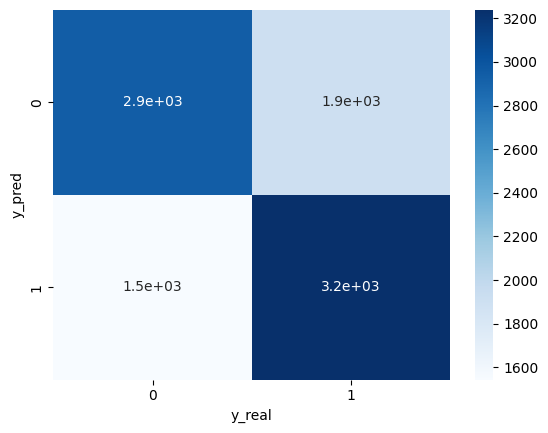

In [ ]:

ds_validacion=pd.DataFrame(y_predic_cat_1, data).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
print("The f1score countVectorizer is  {}".format(f1_score(labels_test, y_predic_cat_1,average='micro',)))
print("The accuracy countVectorizer is  {}".format(accuracy_score(labels_test, y_predic_cat_1)))
print("The precision countVectorizer is {}".format(precision_score(labels_test, y_predic_cat_1, average='micro',)))
print("The recall countVectorizer is {}".format(recall_score(labels_test, y_predic_cat_1, average='micro',)))

The f1score countVectorizer is  0.6412784061429906
The accuracy countVectorizer is  0.6412784061429906
The precision countVectorizer is 0.6412784061429906
The recall countVectorizer is 0.6412784061429906


# Ensamble

## Voting

### Preparacion

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.ensemble import StackingClassifier


In [ ]:
xgboost_model = joblib.load('/content/drive/MyDrive/pkl/XGBOOST__GridSearch_countvectorizer_cross_val.pkl')
bn_model = joblib.load('/content/drive/MyDrive/pkl/naive_bayes_cross_valgs1.pkl')
rf_model = joblib.load('/content/drive/MyDrive/pkl/rf_base_countvectorizer_random_search.pkl')

[00:53:56] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [ ]:
reviews_train, reviews_test, labels_train, labels_test = train_test_split(df.review_es, df.sentimiento, test_size=0.2, random_state=42)


In [ ]:
label_encoder = LabelEncoder()
encoded_labels_train = label_encoder.fit_transform(labels_train)
encoded_labels_test = label_encoder.fit_transform(labels_test)

In [ ]:

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('xgb', xgboost_model), ('nb', bn_model), ('rf', rf_model)], voting = 'hard')

#Entreno el ensemble
vot_clf.fit(reviews_train, encoded_labels_train)

#Evaluo en conjunto de test
pred = vot_clf.predict(reviews_test)
accuracy_score(encoded_labels_test, pred)

0.8402

Text(50.722222222222214, 0.5, 'True')

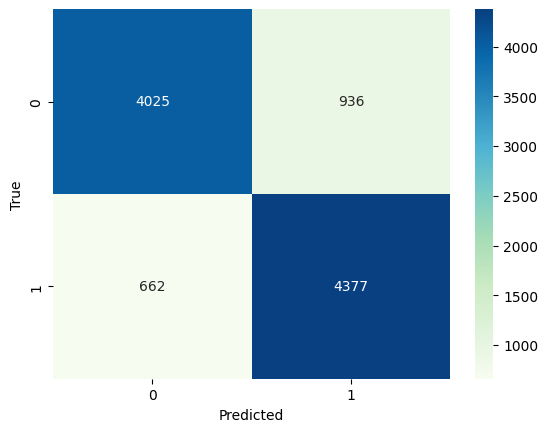

In [ ]:
tabla = confusion_matrix(encoded_labels_test, pred)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Prediccion

In [ ]:
prediccion = vot_clf.predict(df_test.review_es)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['ID'], 'sentimiento':prediccion})
df_submission['sentimiento'].replace(to_replace = 0, value = 'negativo', inplace=True)
df_submission['sentimiento'].replace(to_replace = 1, value = 'positivo', inplace=True)
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_bvoting_tp2.csv', index=False)